In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv('dataset_1.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


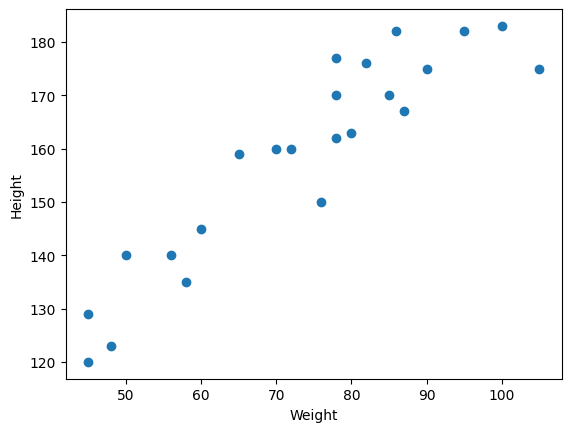

In [5]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [6]:
df.corr()

,Weight,Height
Weight,1.000000,0.923621
Height,0.923621,1.000000


In [7]:
import seaborn as sns

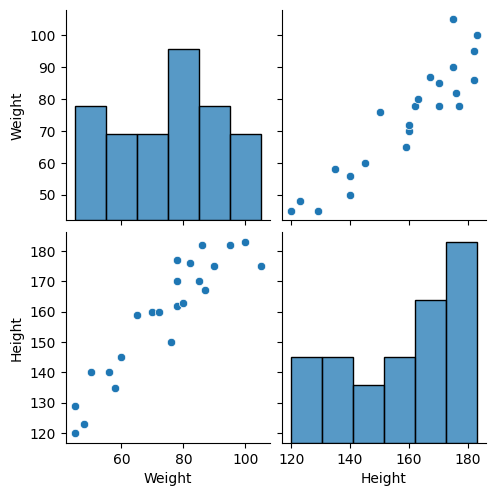

In [8]:
sns.pairplot(df)
plt.show()

In [9]:
# independent and dependent features
x=df[['Weight']]  #independent feature should be a dataframe 
y=df['Height'] # this variable can be in series or 1D


In [10]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
import sklearn

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [14]:
x_train.shape

(17, 1)

In [15]:
np.array(x_train)

array([[ 58],
       [100],
       [ 78],
       [ 48],
       [ 86],
       [ 45],
       [ 60],
       [ 70],
       [ 76],
       [ 50],
       [ 56],
       [ 72],
       [ 90],
       [ 82],
       [ 85],
       [ 87],
       [ 80]])

In [16]:
# standardization (by applying z_score formula to all data points)
from sklearn.preprocessing import StandardScaler


In [17]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)

In [18]:
x_test=scaler.transform(x_test)

In [19]:
## apply linear regression

In [20]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)

In [21]:
regression.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [22]:
regression

LinearRegression(n_jobs=-1)

In [23]:
print('coefficiant or slope:',regression.coef_)
print(f'coefficiant or slope:{regression.intercept_}')

coefficiant or slope: [17.09837574]
coefficiant or slope:156.47058823529412


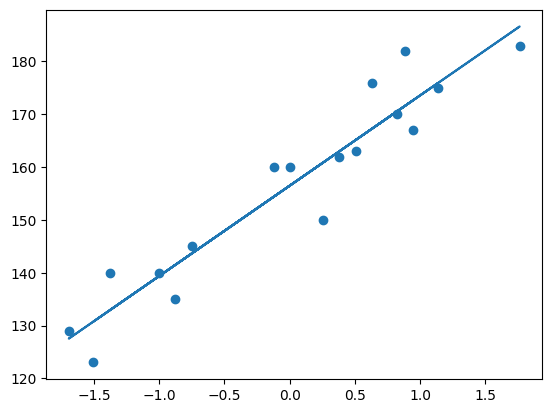

In [24]:
## plot best fit line
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train))
plt.show()


In [25]:
## prediction for test data
y_predict=regression.predict(x_test)

## PREDICTION OF TEST DATA
1. PREDICT HEIGHT OUTPUT=INTERCEPT+coef_(weights)
2. y_pred_test=162+15.84(x_test)

In [26]:
#performance Metrics

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [28]:
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

115.26298140666415
9.381412622465257
10.736059864152406


# R squared

Formula

**1 - residual sum of square / total sum of squares**



In [29]:
from sklearn.metrics import r2_score

In [30]:
score=r2_score(y_test,y_predict)
print(score)

0.7351122035978354


## ADJUSTED R SQUARED 
**Adj_r2 = 1 - (1-r2_score(y, y_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)**

In [31]:
1 - ( 1-score) * ( len(y_test) - 1 ) / ( len(y_test) - x_test.shape[1] - 1 )

0.6688902544972942

In [32]:
pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [33]:
# OLS simple linar regression
import statsmodels.api as sm
print(sm.__version__)


0.14.3


In [34]:
model=sm.OLS(y_train,x_train).fit()
model.predict(x_test)

array([  6.51155804,   6.51155804, -28.95430662,  24.78185196,
        -7.45984319,  35.52908367])

In [35]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1908
Date:                Thu, 19 Sep 2024   Prob (F-statistic):                       0.668
Time:                        18:32:28   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [36]:
# prediction for new data
regression.predict(scaler.transform([[80]]))

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([165.13159262])

In [39]:
print(len(y_test), len(y_predict))


6 6
